In [1]:
import os
import pandas as pd
import numpy as np
import PIL
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from fastai.vision.all import *

In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
os.getcwd()
os.chdir("./drive/MyDrive/Hackaton")
os.getcwd()

In [ ]:
train = pd.read_csv('train.csv')
test =pd.read_csv('test.csv')
train

In [ ]:
test

,latitude,longitude,year,example_path
0,0.761681,122.755954,2006,train_test_data/test/69.png
1,-8.059785,113.053791,2007,train_test_data/test/469.png
2,-2.006610,111.746316,2002,train_test_data/test/6.png
3,0.901765,114.042495,2016,train_test_data/test/351.png
4,1.911210,100.829633,2008,train_test_data/test/1001.png
...,...,...,...,...
630,1.650899,101.314723,2011,train_test_data/test/968.png
631,-1.645649,102.612332,2010,train_test_data/test/54.png
632,-0.557796,114.561609,2016,train_test_data/test/494.png
633,-3.037549,113.872045,2009,train_test_data/test/287.png


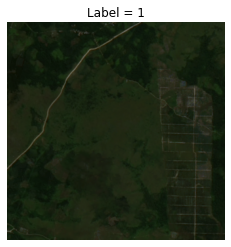

In [ ]:
#Visualize an image
img = mpimg.imread('train_test_data/train/0.png')
plt.imshow(img)
plt.title("Label = " + str(train[train['example_path']=='train_test_data/train/0.png']['label'].values[0]))
plt.axis('off')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


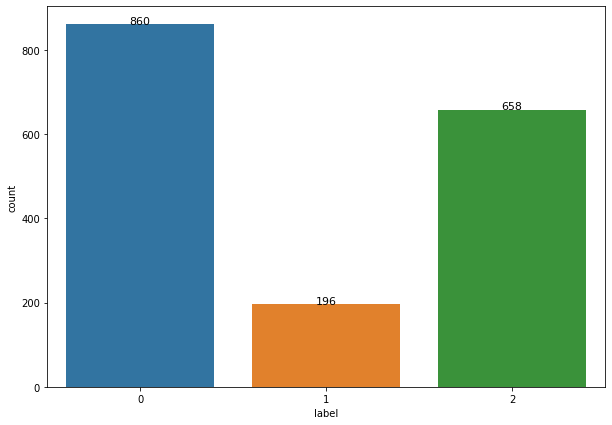

In [ ]:
countplt, ax = plt.subplots(figsize = (10,7))
ax = sns.countplot(train['label']);

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

In [5]:
#We divide our train data on train and validation into 80-20
from random import shuffle
train_val_0 = np.zeros(round(train.shape[0]*0.8))
train_val_1 = np.ones(train.shape[0] - train_val_0.shape[0])

is_val = np.concatenate((train_val_0,train_val_1)).astype('bool')

In [6]:
df = pd.DataFrame([train["example_path"], train["label"]]).transpose()
df['is_val'] = is_val
df.sample(frac = 1)

,example_path,label,is_val
981,train_test_data/train/43.png,2,False
103,train_test_data/train/1905.png,2,False
1620,train_test_data/train/937.png,2,True
1423,train_test_data/train/1979.png,0,True
804,train_test_data/train/908.png,2,False
...,...,...,...
520,train_test_data/train/771.png,0,False
1678,train_test_data/train/1750.png,1,True
249,train_test_data/train/2053.png,0,False
1381,train_test_data/train/586.png,1,True


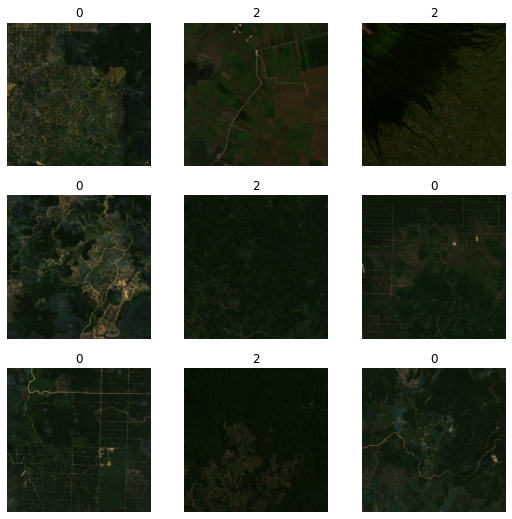

In [7]:
dls = ImageDataLoaders.from_df(df, valid_col = "is_val", bs = 16)
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet34, metrics = F1Score(average = "macro"))

epocs = 100
learn.fine_tune(epocs)

In [ ]:
learn.export("model1.pkl")

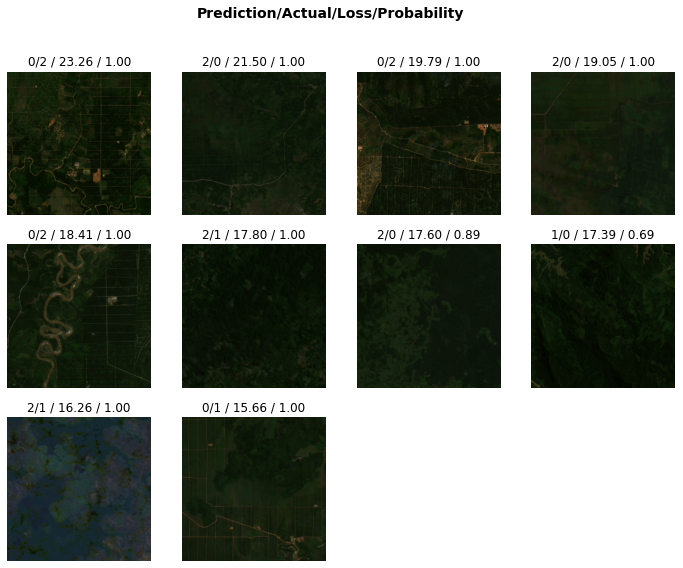

In [ ]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(k = 10)

In [8]:
learn = vision_learner(dls, vgg16_bn, metrics = F1Score(average = "macro"))

epocs = 70
learn.fine_tune(epocs)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,f1_score,time
0,1.303283,0.990811,0.620255,03:24


epoch,train_loss,valid_loss,f1_score,time
0,0.782846,0.744512,0.706004,00:52
1,0.569739,0.693479,0.686236,00:52
2,0.436931,0.702727,0.715062,00:52
3,0.296964,0.755062,0.703457,00:53
4,0.227654,0.850628,0.710973,00:53
5,0.152150,0.900914,0.689778,00:53
6,0.121463,0.956488,0.707486,00:53
7,0.124828,1.018965,0.695927,00:53
8,0.127381,1.213927,0.688714,00:53
9,0.137371,1.067118,0.720719,00:53


In [9]:
learn.export('model_vgg16_bn.pkl')

In [ ]:
df[df["is_val"]==True]

,example_path,label,is_val
1371,train_test_data/train/104.png,0,True
1372,train_test_data/train/939.png,0,True
1373,train_test_data/train/2017.png,0,True
1374,train_test_data/train/825.png,0,True
1375,train_test_data/train/466.png,1,True
...,...,...,...
1709,train_test_data/train/550.png,0,True
1710,train_test_data/train/2264.png,0,True
1711,train_test_data/train/1486.png,1,True
1712,train_test_data/train/1170.png,2,True


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


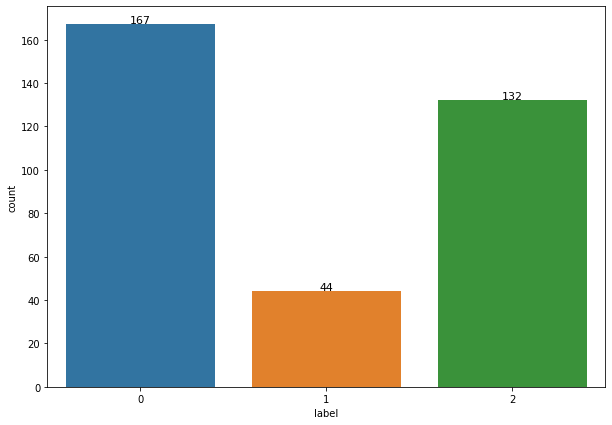

In [ ]:
countplt, ax = plt.subplots(figsize = (10,7))
ax = sns.countplot(df[df["is_val"]==True]["label"]);

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

In [ ]:
learn.export("model_resnet50.pkl")

In [ ]:
learn = vision_learner(dls,  resnet18, metrics = F1Score(average = "macro"))

epocs = 70
learn.fine_tune(epocs)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,f1_score,time
0,1.646994,1.042654,0.572793,04:29


epoch,train_loss,valid_loss,f1_score,time
0,0.935669,0.865622,0.634325,00:15
1,0.747546,0.819611,0.647313,00:13
2,0.608701,0.865208,0.667025,00:14
3,0.485041,0.887938,0.668950,00:15
4,0.393894,0.939745,0.662236,00:13
5,0.298915,0.957315,0.656772,00:13
6,0.227785,1.005777,0.653984,00:15
7,0.174441,1.056168,0.674879,00:15
8,0.133796,1.027893,0.669015,00:14
9,0.102966,1.166026,0.646552,00:15
